Going to import the libraries that I'm going to need for the project

In [240]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files



import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

Libraries imported.


Now I'm going to create a dataframe for the neighorhoods with Latitudes and Longitudes

In [241]:
d={'Neighborhoods':['Buckhall','Bull Run','Bull Run Mountain Estates','Cherry Hill','County Center CDP','Dale City','Dumfries',
                    'Gainesville','Haymarket','Independent Hill','Lake Ridge','Linton Hall','Loch Lomond',
                    'Marumsco CDP','Montclair','Neabsco CDP','Nokesville','Occoquan','Potomac Mills',
                    'Quantico Base CDP','Quantico','Sudley','Triangle','Woodbridge','Yorkshire'
],'Latitude':[38.7318,38.7837,38.9037,38.5698,38.6916,38.6371,38.5676,38.7957,38.8121,38.636,38.6879,38.7598,38.7862,38.637,38.611,38.6083,38.6987,
              38.6837,38.646,38.5226,38.5223,38.7929,38.5468,38.6582,38.7932],
   'Longitude':[-77.4311,-77.5205,-77.6617,-77.2669,-77.3506,-77.3111,-77.328,-77.6139,-77.6364,-77.4378,-77.2978,-77.575,-77.478,-77.2618,
                -77.3397,-77.2847,-77.5797,-77.2603,-77.2942,-77.3182,-77.2936,-77.4975,-77.3366,-77.2497,-77.4478],
  'Label':[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]}

In [242]:
pw_df=pd.DataFrame(data=d)
pw_df

,Neighborhoods,Latitude,Longitude,Label
0,Buckhall,38.7318,-77.4311,0
1,Bull Run,38.7837,-77.5205,1
2,Bull Run Mountain Estates,38.9037,-77.6617,2
3,Cherry Hill,38.5698,-77.2669,3
4,County Center CDP,38.6916,-77.3506,4
5,Dale City,38.6371,-77.3111,5
6,Dumfries,38.5676,-77.3280,6
7,Gainesville,38.7957,-77.6139,7
8,Haymarket,38.8121,-77.6364,8
9,Independent Hill,38.6360,-77.4378,9


Now I'm going to define my FourSquare API

In [243]:
CLIENT_ID = '0NIA5VEH3WEQ0510JA1NU4MOC40RAH43JUN4RXPXWILLAMDH' 
CLIENT_SECRET = 'ZJ4NUWKZENF2N0SAGAXVCOLDGWLYCIGAME4K0ROEGBV5MQ3H' 
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0NIA5VEH3WEQ0510JA1NU4MOC40RAH43JUN4RXPXWILLAMDH
CLIENT_SECRET:ZJ4NUWKZENF2N0SAGAXVCOLDGWLYCIGAME4K0ROEGBV5MQ3H


Now I'm going to call to FourSquare API to get info about how many Fast Food Restruants are there in Prince William County

In [244]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [245]:
pwcW_lat=38.750660
pwcW_long=-77.475143 

In [246]:
LIMIT=200 #looking at the top 150 fast food restruants entrees

radius=82000 #this is about a 25 mile radius in meters

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=Fast Food Restaurant'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    pwcW_lat, 
    pwcW_long, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=0NIA5VEH3WEQ0510JA1NU4MOC40RAH43JUN4RXPXWILLAMDH&client_secret=ZJ4NUWKZENF2N0SAGAXVCOLDGWLYCIGAME4K0ROEGBV5MQ3H&v=20180605&ll=38.75066,-77.475143&radius=82000&limit=200&query=Fast Food Restaurant'

In [247]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e99cc273907e7001bc1647a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Manassas',
  'headerFullLocation': 'Manassas',
  'headerLocationGranularity': 'city',
  'query': 'fast food restaurant',
  'totalResults': 97,
  'suggestedBounds': {'ne': {'lat': 39.48866073800074,
    'lng': -76.53060617125273},
   'sw': {'lat': 38.01265926199927, 'lng': -78.41967982874728}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c6ece17e6b7b1f72db2ad8e',
       'name': 'Chick-fil-A',
       'location': {'address': '10677 Sudley Manor Dr',
        'lat': 38.7861375,
        'lng': -77.5160612,
        'labeledLatLngs': 

In [248]:
pwcE_lat=38.6582
pwcE_long=-77.459450 

In [249]:
LIMIT=200 #looking at the top 150 fast food restruants entrees

radius=82000 #this is about a 25 mile radius in meters

url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&query=Fast Food Restaurant'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    pwcE_lat, 
    pwcE_long, 
    radius, 
    LIMIT)
url1 

'https://api.foursquare.com/v2/venues/explore?&client_id=0NIA5VEH3WEQ0510JA1NU4MOC40RAH43JUN4RXPXWILLAMDH&client_secret=ZJ4NUWKZENF2N0SAGAXVCOLDGWLYCIGAME4K0ROEGBV5MQ3H&v=20180605&ll=38.6582,-77.45945&radius=82000&limit=200&query=Fast Food Restaurant'

In [250]:
results2 = requests.get(url1).json()
results2

{'meta': {'code': 200, 'requestId': '5e99cbadb4b684001cdffc59'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Nokesville',
  'headerFullLocation': 'Nokesville',
  'headerLocationGranularity': 'city',
  'query': 'fast food restaurant',
  'totalResults': 89,
  'suggestedBounds': {'ne': {'lat': 39.396200738000736,
    'lng': -76.51613371341801},
   'sw': {'lat': 37.920199261999265, 'lng': -78.402766286582}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5675dc77498e015edc535d51',
       'name': 'Chick-fil-A',
       'location': {'address': '4101 Old Bridge Road',
        'lat': 38.6723496,
        'lng': -77.3345826,
        'labeledLatLngs

Now that I got my Json file of the fast food restraunts. I need to clean it and transform it into a dataframe. 

In [251]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,Five Guys,Fast Food Restaurant,38.866939,-77.226900


In [252]:
venues2 = results2['response']['groups'][0]['items']
    
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues2 =nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

nearby_venues2.head()

,name,categories,lat,lng
0,Chick-fil-A,Fast Food Restaurant,38.672350,-77.334583
1,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468


Now I'm going to take a look at each of the dataframes

In [253]:
nearby_venues

,name,categories,lat,lng
0,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468
8,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
9,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032


In [254]:
nearby_venues.shape

(97, 4)

In [255]:
nearby_venues2

,name,categories,lat,lng
0,Chick-fil-A,Fast Food Restaurant,38.672350,-77.334583
1,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468
5,Five Guys,Fast Food Restaurant,38.866939,-77.226900
6,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
8,Arby's,Fast Food Restaurant,38.475710,-77.427226
9,Sheetz,Fast Food Restaurant,38.310518,-77.513114


In [256]:
nearby_venues2.shape

(89, 4)

In [257]:
frames=[nearby_venues, nearby_venues2]
ffr_df=pd.concat(frames)
ffr_df.shape

(186, 4)

Now I'm going to do some scatter plots to help me get a rough idea of clustering

In [258]:
X=ffr_df['lat']
X

0     38.786138
1     38.751540
2     38.737885
3     38.893662
4     38.866939
5     39.010293
6     38.778889
7     38.357781
8     38.788246
9     39.097020
10    38.904613
11    38.769552
12    38.475710
13    38.310518
14    38.890043
15    38.655632
16    38.295458
17    39.074667
18    38.836655
19    38.958609
20    39.079410
21    38.803408
22    38.253752
23    38.853246
24    38.835728
25    38.797490
26    38.360076
27    39.185748
28    39.080447
29    38.292358
30    38.968345
31    38.742729
32    39.120858
33    38.792297
34    38.745239
35    38.903898
36    38.739329
37    39.082186
38    38.642509
39    39.092335
40    39.153289
41    39.056992
42    39.049119
43    39.038525
44    38.860737
45    39.048687
46    39.177703
47    38.640233
48    38.283967
49    38.926100
50    38.938478
51    38.845737
52    38.968719
53    38.945231
54    38.637618
55    38.369679
56    38.357573
57    39.406778
58    39.226905
59    39.065626
60    38.237102
61    38.959261
62    38

In [259]:
y=ffr_df['lng']
y

0    -77.516061
1    -77.450017
2    -77.534348
3    -77.274536
4    -77.226900
5    -77.493744
6    -77.080448
7    -77.517468
8    -77.513465
9    -77.194032
10   -77.062759
11   -76.889327
12   -77.427226
13   -77.513114
14   -76.854707
15   -76.877623
16   -77.494526
17   -77.115919
18   -77.051132
19   -77.001470
20   -77.141845
21   -77.061232
22   -77.499708
23   -77.334231
24   -77.061106
25   -77.519317
26   -77.520231
27   -78.132830
28   -76.690466
29   -77.570115
30   -77.374342
31   -77.451284
32   -77.178897
33   -77.515303
34   -77.084320
35   -77.031696
36   -77.472512
37   -77.077497
38   -77.295110
39   -78.177777
40   -76.724588
41   -77.125663
42   -77.114554
43   -76.679319
44   -77.094868
45   -77.114318
46   -77.270697
47   -77.296904
48   -77.438648
49   -78.194323
50   -77.546922
51   -76.926988
52   -77.378041
53   -77.077934
54   -77.297591
55   -77.529144
56   -77.517029
57   -77.387852
58   -76.816285
59   -77.150482
60   -77.509236
61   -77.402684
62   -77

In [260]:
x1=pw_df['Latitude']

In [261]:
y1=pw_df['Longitude']

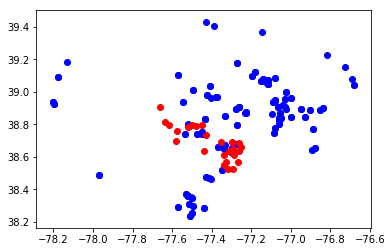

In [262]:

plt.scatter(y, X, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

Clusting time

In [263]:
# set number of clusters
kclusters = 24

fast_food_clustering = ffr_df.drop(['name','categories'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(fast_food_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:175] 

array([12, 12, 12, 10, 10, 18, 14,  1, 12, 11,  5,  2, 15,  1, 23, 20, 19,
       11, 14,  5, 11, 14, 19,  4, 14, 12,  1, 16,  7,  1,  8, 12, 11, 12,
       14,  5, 12, 11,  6, 16,  7, 11, 11,  7, 14, 11,  0,  6, 19,  3, 18,
       17,  8,  5,  6,  1,  1, 13, 21, 11, 19,  8,  4,  6,  5,  6, 13,  3,
       12, 10, 14,  5,  5,  1, 10, 15, 10, 20,  5,  6, 10, 15,  6,  8, 17,
        9, 23, 17, 15,  4,  5,  8,  5, 17, 22, 18,  5,  6, 12, 12, 10,  1,
       10, 14, 18, 15,  1,  5, 11,  2, 12, 20, 19, 23, 19,  1, 14,  1, 14,
        5, 11, 11, 14,  4, 12, 12,  8, 10, 11, 14,  6,  6, 12, 19,  5,  6,
       12, 11, 16,  7, 11, 11,  1,  1, 17, 11,  3,  6,  1,  0, 18,  6, 19,
        5,  8,  6,  6, 11,  5,  1,  3, 14, 15, 10,  5,  5, 20, 10, 10,  5,
        6,  6, 10,  9, 17], dtype=int32)

In [264]:
ffr_df.insert(0, 'Cluster', kmeans.labels_)


In [265]:
ffr_df

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,1,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468
8,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
9,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032


In [266]:
c0_df=ffr_df[ffr_df.Cluster==0]
c0_df=c0_df.reset_index(drop = True)
c0_df

,Cluster,name,categories,lat,lng
0,0,Roy Rogers,Fast Food Restaurant,39.177703,-77.270697
1,0,Roy Rogers,Fast Food Restaurant,39.177703,-77.270697


In [267]:
ffr0=ffr_df[ffr_df.Cluster !=0]
ffr0=ffr0.reset_index(drop = True)

ffr0


,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,1,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468
8,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
9,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032


In [268]:
c1_df=ffr0[ffr0.Cluster==1]
c1_df=c1_df.reset_index(drop = True)
c1_df

,Cluster,name,categories,lat,lng
0,1,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468
1,1,Sheetz,Fast Food Restaurant,38.310518,-77.513114
2,1,Subway,Fast Food Restaurant,38.360076,-77.520231
3,1,Sonic Drive-In,Fast Food Restaurant,38.292358,-77.570115
4,1,Subway,Fast Food Restaurant,38.369679,-77.529144
5,1,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.357573,-77.517029
6,1,Hardee's,Fast Food Restaurant,38.344708,-77.498954
7,1,Sonic Drive-In,Fast Food Restaurant,38.357781,-77.517468
8,1,Sheetz,Fast Food Restaurant,38.310518,-77.513114
9,1,Subway,Fast Food Restaurant,38.360076,-77.520231


In [269]:
ffr1=ffr0[ffr0.Cluster !=1]
ffr1=ffr1.reset_index(drop = True)

ffr1

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,5,Muncheez,Fast Food Restaurant,38.904613,-77.062759


In [270]:
c2_df=ffr1[ffr1.Cluster==2]
c2_df=c2_df.reset_index(drop = True)
c2_df

,Cluster,name,categories,lat,lng
0,2,Chick-fil-A,Fast Food Restaurant,38.769552,-76.889327
1,2,Chick-fil-A,Fast Food Restaurant,38.769552,-76.889327


In [271]:
ffr2=ffr1[ffr1.Cluster !=2]
ffr2=ffr2.reset_index(drop = True)

ffr2

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,5,Muncheez,Fast Food Restaurant,38.904613,-77.062759


In [272]:
c3_df=ffr2[ffr2.Cluster==3]
c3_df=c3_df.reset_index(drop = True)
c3_df

,Cluster,name,categories,lat,lng
0,3,Subway,Fast Food Restaurant,38.92610,-78.194323
1,3,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.93798,-78.199576
2,3,Subway,Fast Food Restaurant,38.92610,-78.194323
3,3,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.93798,-78.199576


In [273]:
ffr3=ffr2[ffr2.Cluster !=3]
ffr3=ffr3.reset_index(drop = True)

ffr3

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,5,Muncheez,Fast Food Restaurant,38.904613,-77.062759


In [274]:
c4_df=ffr3[ffr3.Cluster==4]
c4_df=c4_df.reset_index(drop = True)
c4_df

,Cluster,name,categories,lat,lng
0,4,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,4,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,4,Burger King,Fast Food Restaurant,38.835109,-77.431495
3,4,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
4,4,Burger King,Fast Food Restaurant,38.835109,-77.431495


In [275]:
ffr4=ffr3[ffr3.Cluster !=4]
ffr4=ffr4.reset_index(drop = True)

ffr4

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,5,Muncheez,Fast Food Restaurant,38.904613,-77.062759


In [276]:
c5_df=ffr4[ffr4.Cluster==5]
c5_df=c5_df.reset_index(drop = True)
c5_df

,Cluster,name,categories,lat,lng
0,5,Muncheez,Fast Food Restaurant,38.904613,-77.062759
1,5,Five Guys,Fast Food Restaurant,38.958609,-77.001470
2,5,Jimmy John's,Fast Food Restaurant,38.903898,-77.031696
3,5,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.945231,-77.077934
4,5,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.953093,-77.027943
5,5,MOD Pizza,Pizza Place,38.996704,-77.026235
6,5,Lauriol Plaza,Mexican Restaurant,38.915331,-77.041626
7,5,AU – The Tavern,Fast Food Restaurant,38.937031,-77.088669
8,5,Rollerz,Fast Food Restaurant,38.872118,-77.056168
9,5,Subway,Fast Food Restaurant,38.896737,-77.024442


In [277]:
ffr5=ffr4[ffr4.Cluster !=5]
ffr5=ffr5.reset_index(drop = True)

ffr5

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,15,Arby's,Fast Food Restaurant,38.475710,-77.427226


In [278]:
c6_df=ffr5[ffr5.Cluster==6]
c6_df=c6_df.reset_index(drop = True)
c6_df

,Cluster,name,categories,lat,lng
0,6,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
1,6,Guapo's,Mexican Restaurant,38.640233,-77.296904
2,6,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
3,6,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
4,6,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264
5,6,Taco Bell/Pizza Hut,Fast Food Restaurant,38.677139,-77.278500
6,6,McDonald's,Fast Food Restaurant,38.658915,-77.369584
7,6,Chick-fil-A,Fast Food Restaurant,38.672350,-77.334583
8,6,McDonald's,Fast Food Restaurant,38.673390,-77.335561
9,6,The Cheesecake Factory,American Restaurant,38.642509,-77.295110


In [279]:
ffr6=ffr5[ffr5.Cluster !=6]
ffr6=ffr6.reset_index(drop = True)

ffr6

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,15,Arby's,Fast Food Restaurant,38.475710,-77.427226


In [280]:
c7_df=ffr6[ffr6.Cluster==7]
c7_df=c7_df.reset_index(drop = True)
c7_df

,Cluster,name,categories,lat,lng
0,7,Five Guys,Fast Food Restaurant,39.080447,-76.690466
1,7,Chipotle Mexican Grill,Fast Food Restaurant,39.153289,-76.724588
2,7,Firehouse Subs,Sandwich Place,39.038525,-76.679319
3,7,Firehouse Subs,Sandwich Place,39.038525,-76.679319


In [281]:
ffr7=ffr6[ffr6.Cluster !=7]
ffr7=ffr7.reset_index(drop = True)

ffr7

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,15,Arby's,Fast Food Restaurant,38.475710,-77.427226


In [282]:
c8_df=ffr7[ffr7.Cluster==8]
c8_df=c8_df.reset_index(drop = True)
c8_df

,Cluster,name,categories,lat,lng
0,8,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.968345,-77.374342
1,8,Pollo Campero,Fried Chicken Joint,38.968719,-77.378041
2,8,Wendy’s,Fast Food Restaurant,38.959261,-77.402684
3,8,Burger King,Fast Food Restaurant,38.979417,-77.422862
4,8,Taco Bell/KFC,Fast Food Restaurant,39.036175,-77.409513
5,8,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.968345,-77.374342
6,8,Pollo Campero,Fried Chicken Joint,38.968719,-77.378041
7,8,Burger King,Fast Food Restaurant,38.979417,-77.422862
8,8,Taco Bell/KFC,Fast Food Restaurant,39.036175,-77.409513


In [283]:
ffr8=ffr7[ffr7.Cluster !=8]
ffr8=ffr8.reset_index(drop = True)

ffr8

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,15,Arby's,Fast Food Restaurant,38.475710,-77.427226


In [284]:
c9_df=ffr8[ffr8.Cluster==9]
c9_df=c9_df.reset_index(drop = True)
c9_df

,Cluster,name,categories,lat,lng
0,9,Chipotle Mexican Grill,Mexican Restaurant,38.485179,-77.967271
1,9,Chipotle Mexican Grill,Mexican Restaurant,38.485179,-77.967271


In [285]:
ffr9=ffr8[ffr8.Cluster !=9]
ffr9=ffr9.reset_index(drop = True)

ffr9

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
4,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
5,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
6,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
7,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
8,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
9,15,Arby's,Fast Food Restaurant,38.475710,-77.427226


In [286]:
c10_df=ffr9[ffr9.Cluster==10]
c10_df=c10_df.reset_index(drop = True)
c10_df

,Cluster,name,categories,lat,lng
0,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
1,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
2,10,KFC,Fast Food Restaurant,38.906036,-77.260151
3,10,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.904771,-77.259579
4,10,Arby's,Fast Food Restaurant,38.874378,-77.226253
5,10,Lebanese Bistro,Fast Food Restaurant,38.794882,-77.271004
6,10,Chick-fil-A,Fast Food Restaurant,38.893662,-77.274536
7,10,Five Guys,Fast Food Restaurant,38.866939,-77.226900
8,10,Wendy’s,Fast Food Restaurant,38.866085,-77.230587
9,10,KFC,Fast Food Restaurant,38.906036,-77.260151


In [287]:
ffr10=ffr9[ffr9.Cluster !=10]
ffr10=ffr10.reset_index(drop = True)

ffr10

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
4,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
5,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
6,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
7,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
8,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
9,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623


In [288]:
c11_df=ffr10[ffr10.Cluster==11]
c11_df=c11_df.reset_index(drop = True)
c11_df

,Cluster,name,categories,lat,lng
0,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032
1,11,Dairy Queen,Fast Food Restaurant,39.074667,-77.115919
2,11,Roy Rogers,Fast Food Restaurant,39.079410,-77.141845
3,11,Checkers,Fast Food Restaurant,39.120858,-77.178897
4,11,Roy Rogers,Fast Food Restaurant,39.082186,-77.077497
5,11,Panera Bread,Bakery,39.056992,-77.125663
6,11,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.049119,-77.114554
7,11,Arby's,Fast Food Restaurant,39.048687,-77.114318
8,11,Clyde's Tower Oaks Lodge,American Restaurant,39.065626,-77.150482
9,11,Krispy Kreme Doughnuts,Fast Food Restaurant,39.097020,-77.194032


In [289]:
ffr11=ffr10[ffr10.Cluster !=11]
ffr11=ffr11.reset_index(drop = True)

ffr11

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
4,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
5,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
6,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
7,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
8,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
9,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526


In [290]:
c12_df=ffr11[ffr11.Cluster==12]
c12_df=c12_df.reset_index(drop = True)
c12_df

,Cluster,name,categories,lat,lng
0,12,Chick-fil-A,Fast Food Restaurant,38.786138,-77.516061
1,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017
2,12,Chick-fil-A,Fast Food Restaurant,38.737885,-77.534348
3,12,Taco Bell,Fast Food Restaurant,38.788246,-77.513465
4,12,Sonic,Fast Food Restaurant,38.797490,-77.519317
5,12,McDonald's,Fast Food Restaurant,38.742729,-77.451284
6,12,Checkers,Fast Food Restaurant,38.792297,-77.515303
7,12,Taco Bell,Fast Food Restaurant,38.739329,-77.472512
8,12,McDonald's,Fast Food Restaurant,38.798928,-77.517686
9,12,Chick-fil-A,Fast Food Restaurant,38.751540,-77.450017


In [291]:
ffr12=ffr11[ffr11.Cluster !=12]
ffr12=ffr12.reset_index(drop = True)

ffr12

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
2,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
3,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
4,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
5,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
6,14,Five Guys,Fast Food Restaurant,38.836655,-77.051132
7,14,Jimmy John's,Fast Food Restaurant,38.803408,-77.061232
8,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
9,14,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.835728,-77.061106


In [292]:
c13_df=ffr12[ffr12.Cluster==13]
c13_df=c13_df.reset_index(drop = True)
c13_df

,Cluster,name,categories,lat,lng
0,13,Sheetz,Gas Station,39.406778,-77.387852
1,13,Sheetz,Gas Station,39.426272,-77.430840


In [293]:
ffr13=ffr12[ffr12.Cluster !=13]
ffr13=ffr13.reset_index(drop = True)

ffr13

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
2,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
3,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
4,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
5,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
6,14,Five Guys,Fast Food Restaurant,38.836655,-77.051132
7,14,Jimmy John's,Fast Food Restaurant,38.803408,-77.061232
8,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
9,14,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.835728,-77.061106


In [294]:
c14_df=ffr13[ffr13.Cluster==14]
c14_df=c14_df.reset_index(drop = True)
c14_df

,Cluster,name,categories,lat,lng
0,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
1,14,Five Guys,Fast Food Restaurant,38.836655,-77.051132
2,14,Jimmy John's,Fast Food Restaurant,38.803408,-77.061232
3,14,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.835728,-77.061106
4,14,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.745239,-77.084320
5,14,Burger King,Fast Food Restaurant,38.860737,-77.094868
6,14,Los Tios Grill,Mexican Restaurant,38.829040,-77.059020
7,14,Krispy Kreme Doughnuts,Fast Food Restaurant,38.778889,-77.080448
8,14,Five Guys,Fast Food Restaurant,38.836655,-77.051132
9,14,Jimmy John's,Fast Food Restaurant,38.803408,-77.061232


In [295]:
ffr14=ffr13[ffr13.Cluster !=14]
ffr14=ffr14.reset_index(drop = True)

ffr14

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
2,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
3,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
4,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
5,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
6,16,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,39.185748,-78.132830
7,16,Subway,Fast Food Restaurant,39.092335,-78.177777
8,19,Subway,Fast Food Restaurant,38.283967,-77.438648
9,18,Wendy’s,Fast Food Restaurant,38.938478,-77.546922


In [296]:
c15_df=ffr14[ffr14.Cluster==15]
c15_df=c15_df.reset_index(drop = True)
c15_df

,Cluster,name,categories,lat,lng
0,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
1,15,Hardee's,Fast Food Restaurant,38.470870,-77.413330
2,15,KFC,Fast Food Restaurant,38.460040,-77.405804
3,15,McDonald's,Fast Food Restaurant,38.519139,-77.347439
4,15,Arby's,Fast Food Restaurant,38.475710,-77.427226
5,15,Hardee's,Fast Food Restaurant,38.470870,-77.413330
6,15,McDonald's,Fast Food Restaurant,38.519139,-77.347439


In [297]:
ffr15=ffr14[ffr14.Cluster !=15]
ffr15=ffr15.reset_index(drop = True)

ffr15

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
2,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
3,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
4,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
5,16,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,39.185748,-78.132830
6,16,Subway,Fast Food Restaurant,39.092335,-78.177777
7,19,Subway,Fast Food Restaurant,38.283967,-77.438648
8,18,Wendy’s,Fast Food Restaurant,38.938478,-77.546922
9,17,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.845737,-76.926988


In [298]:
c16_df=ffr15[ffr15.Cluster==16]
c16_df=c16_df.reset_index(drop = True)
c16_df

,Cluster,name,categories,lat,lng
0,16,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,39.185748,-78.132830
1,16,Subway,Fast Food Restaurant,39.092335,-78.177777
2,16,Subway,Fast Food Restaurant,39.092335,-78.177777


In [299]:
ffr16=ffr15[ffr15.Cluster !=16]
ffr16=ffr16.reset_index(drop = True)

ffr16

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
2,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
3,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
4,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
5,19,Subway,Fast Food Restaurant,38.283967,-77.438648
6,18,Wendy’s,Fast Food Restaurant,38.938478,-77.546922
7,17,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.845737,-76.926988
8,21,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.226905,-76.816285
9,19,Subway,Fast Food Restaurant,38.237102,-77.509236


In [300]:
c17_df=ffr16[ffr16.Cluster==17]
c17_df=c17_df.reset_index(drop = True)
c17_df

,Cluster,name,categories,lat,lng
0,17,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.845737,-76.926988
1,17,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.844926,-76.997012
2,17,McDonald's,Fast Food Restaurant,38.893531,-76.949715
3,17,Popeyes Louisiana Kitchen,Fried Chicken Joint,38.887565,-76.901987
4,17,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.845737,-76.926988
5,17,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.844926,-76.997012
6,17,McDonald's,Fast Food Restaurant,38.893531,-76.949715
7,17,Popeyes Louisiana Kitchen,Fried Chicken Joint,38.887565,-76.901987


In [301]:
ffr17=ffr16[ffr16.Cluster !=17]
ffr17=ffr17.reset_index(drop = True)

ffr17

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
2,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
3,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
4,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
5,19,Subway,Fast Food Restaurant,38.283967,-77.438648
6,18,Wendy’s,Fast Food Restaurant,38.938478,-77.546922
7,21,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.226905,-76.816285
8,19,Subway,Fast Food Restaurant,38.237102,-77.509236
9,20,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.643449,-76.894222


In [302]:
c18_df=ffr17[ffr17.Cluster==18]
c18_df=c18_df.reset_index(drop = True)
c18_df

,Cluster,name,categories,lat,lng
0,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
1,18,Wendy’s,Fast Food Restaurant,38.938478,-77.546922
2,18,Juliano's Pizza,Pizza Place,39.102909,-77.571544
3,18,Chick-fil-A,Fast Food Restaurant,39.010293,-77.493744
4,18,Wendy’s,Fast Food Restaurant,38.938478,-77.546922
5,18,Juliano's Pizza,Pizza Place,39.102909,-77.571544


In [303]:
ffr18=ffr17[ffr17.Cluster !=18]
ffr18=ffr18.reset_index(drop = True)

ffr18

,Cluster,name,categories,lat,lng
0,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
1,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
2,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
3,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
4,19,Subway,Fast Food Restaurant,38.283967,-77.438648
5,21,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.226905,-76.816285
6,19,Subway,Fast Food Restaurant,38.237102,-77.509236
7,20,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.643449,-76.894222
8,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227
9,22,Siempre De Fiesta,Mexican Restaurant,39.368864,-77.144720


In [304]:
c19_df=ffr18[ffr18.Cluster==19]
c19_df=c19_df.reset_index(drop = True)
c19_df

,Cluster,name,categories,lat,lng
0,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
1,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
2,19,Subway,Fast Food Restaurant,38.283967,-77.438648
3,19,Subway,Fast Food Restaurant,38.237102,-77.509236
4,19,Cook Out,Fast Food Restaurant,38.295458,-77.494526
5,19,Dairy Queen,Fast Food Restaurant,38.253752,-77.499708
6,19,Subway,Fast Food Restaurant,38.283967,-77.438648
7,19,Subway,Fast Food Restaurant,38.237102,-77.509236


In [305]:
ffr19=ffr18[ffr18.Cluster !=19]
ffr19=ffr19.reset_index(drop = True)

ffr19

,Cluster,name,categories,lat,lng
0,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
1,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
2,21,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.226905,-76.816285
3,20,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.643449,-76.894222
4,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227
5,22,Siempre De Fiesta,Mexican Restaurant,39.368864,-77.144720
6,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
7,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
8,20,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.643449,-76.894222
9,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227


In [306]:
c20_df=ffr19[ffr19.Cluster==20]
c20_df=c20_df.reset_index(drop = True)
c20_df

,Cluster,name,categories,lat,lng
0,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
1,20,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.643449,-76.894222
2,20,Sonic Drive-In,Fast Food Restaurant,38.655632,-76.877623
3,20,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.643449,-76.894222


In [307]:
ffr20=ffr19[ffr19.Cluster !=20]
ffr20=ffr20.reset_index(drop = True)

ffr20

,Cluster,name,categories,lat,lng
0,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
1,21,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.226905,-76.816285
2,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227
3,22,Siempre De Fiesta,Mexican Restaurant,39.368864,-77.144720
4,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
5,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227


In [308]:
c21_df=ffr20[ffr20.Cluster==21]
c21_df=c21_df.reset_index(drop = True)
c21_df

,Cluster,name,categories,lat,lng
0,21,Popeyes Louisiana Kitchen,Fast Food Restaurant,39.226905,-76.816285


In [309]:
ffr21=ffr20[ffr20.Cluster !=21]
ffr21=ffr21.reset_index(drop = True)

ffr21

,Cluster,name,categories,lat,lng
0,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
1,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227
2,22,Siempre De Fiesta,Mexican Restaurant,39.368864,-77.144720
3,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
4,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227


In [310]:
c22_df=ffr21[ffr21.Cluster==22]
c22_df=c22_df.reset_index(drop = True)
c22_df

,Cluster,name,categories,lat,lng
0,22,Siempre De Fiesta,Mexican Restaurant,39.368864,-77.14472


In [311]:
c23_df=ffr21[ffr21.Cluster !=22]
c23_df=c23_df.reset_index(drop = True)
c23_df

,Cluster,name,categories,lat,lng
0,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
1,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227
2,23,Krispy Kreme Doughnuts,Fast Food Restaurant,38.890043,-76.854707
3,23,Bojangles' Famous Chicken 'n Biscuits,Fast Food Restaurant,38.901893,-76.837227


Since I have created 24 dataframes each containing a cluster. Now I will examine each cluster to see which ones are closest to the neighborhoods of PWC.

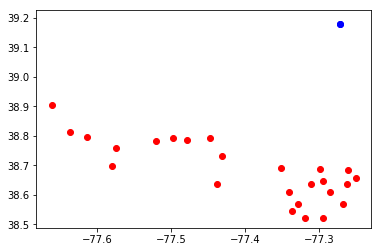

In [312]:
X0=c0_df['lat']
y0=c0_df['lng']
plt.scatter(y0, X0, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

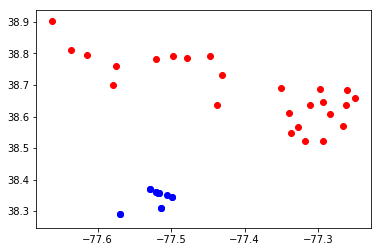

In [313]:
X1=c1_df['lat']
Y1=c1_df['lng']
plt.scatter(Y1, X1, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

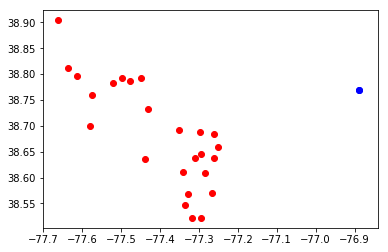

In [314]:
X2=c2_df['lat']
Y2=c2_df['lng']
plt.scatter(Y2, X2, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

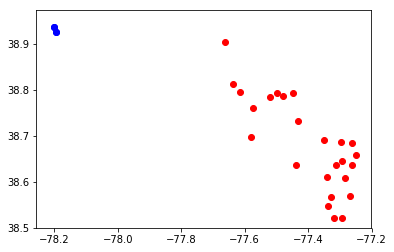

In [315]:
X3=c3_df['lat']
Y3=c3_df['lng']
plt.scatter(Y3, X3, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

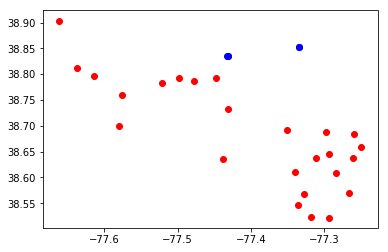

In [316]:
X4=c4_df['lat']
Y4=c4_df['lng']
plt.scatter(Y4, X4, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

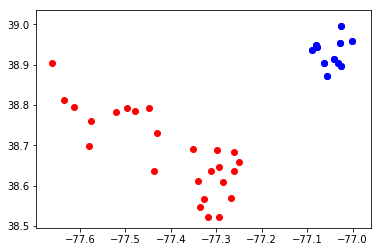

In [317]:
X5=c5_df['lat']
Y5=c5_df['lng']
plt.scatter(Y5, X5, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

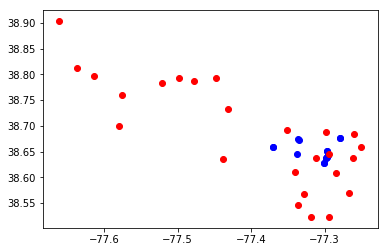

In [318]:
X6=c6_df['lat']
Y6=c6_df['lng']
plt.scatter(Y6, X6, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

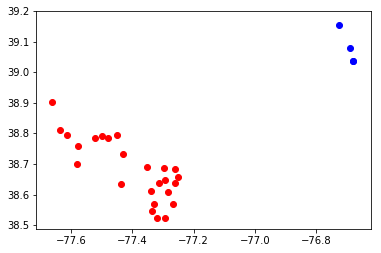

In [319]:
X7=c7_df['lat']
Y7=c7_df['lng']
plt.scatter(Y7, X7, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

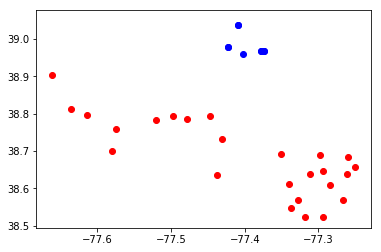

In [320]:
X8=c8_df['lat']
Y8=c8_df['lng']
plt.scatter(Y8, X8, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

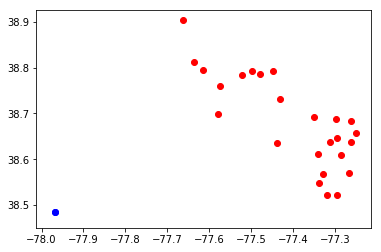

In [321]:
X9=c9_df['lat']
Y9=c9_df['lng']
plt.scatter(Y9, X9, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

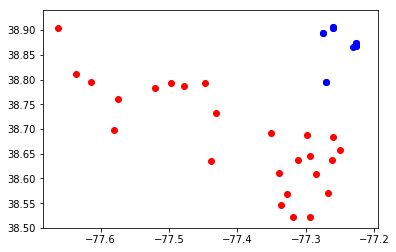

In [322]:
X10=c10_df['lat']
Y10=c10_df['lng']
plt.scatter(Y10, X10, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

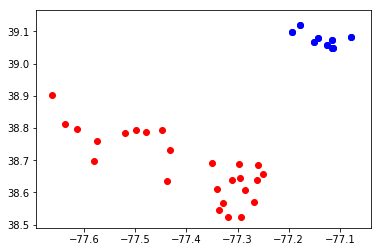

In [323]:
X11=c11_df['lat']
Y11=c11_df['lng']
plt.scatter(Y11, X11, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

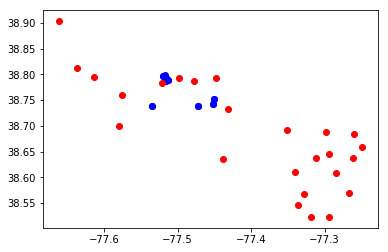

In [324]:
X12=c12_df['lat']
Y12=c12_df['lng']
plt.scatter(Y12, X12, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

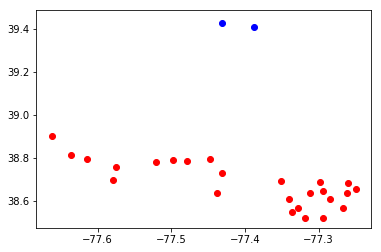

In [325]:
X13=c13_df['lat']
Y13=c13_df['lng']
plt.scatter(Y13, X13, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

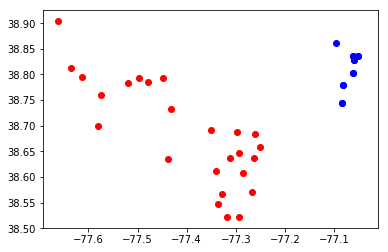

In [326]:
X14=c14_df['lat']
Y14=c14_df['lng']
plt.scatter(Y14, X14, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

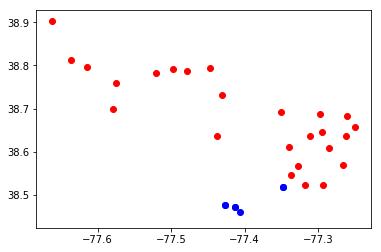

In [327]:
X15=c15_df['lat']
Y15=c15_df['lng']
plt.scatter(Y15, X15, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

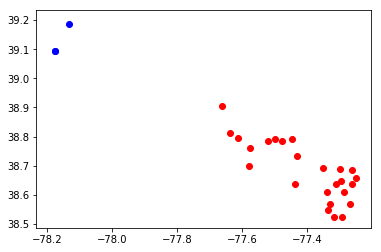

In [328]:
X16=c16_df['lat']
Y16=c16_df['lng']
plt.scatter(Y16, X16, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

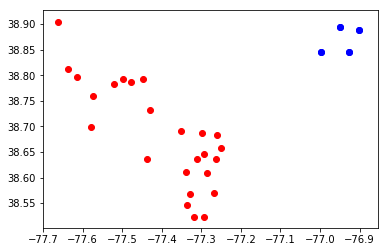

In [329]:
X17=c17_df['lat']
Y17=c17_df['lng']
plt.scatter(Y17, X17, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

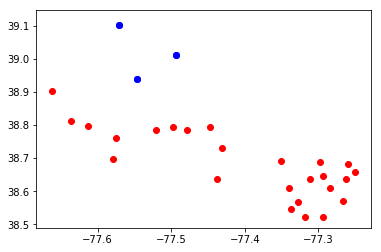

In [330]:
X18=c18_df['lat']
Y18=c18_df['lng']
plt.scatter(Y18, X18, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

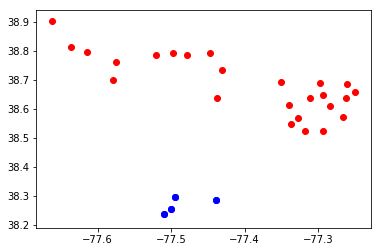

In [331]:
X19=c19_df['lat']
Y19=c19_df['lng']
plt.scatter(Y19, X19, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

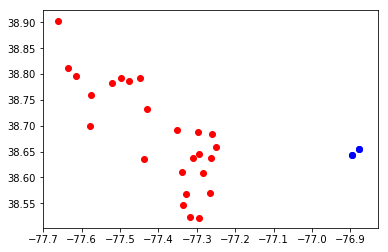

In [332]:
X20=c20_df['lat']
Y20=c20_df['lng']
plt.scatter(Y20, X20, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

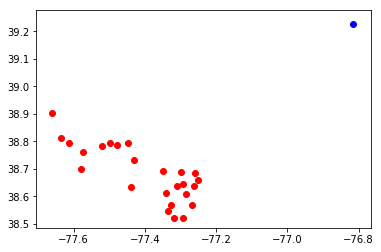

In [333]:
X21=c21_df['lat']
Y21=c21_df['lng']
plt.scatter(Y21, X21, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

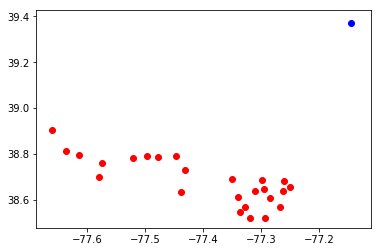

In [334]:
X22=c22_df['lat']
Y22=c22_df['lng']
plt.scatter(Y22, X22, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

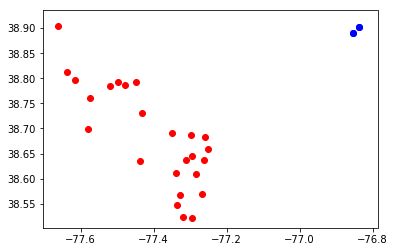

In [335]:
X23=c23_df['lat']
Y23=c23_df['lng']
plt.scatter(Y23, X23, color="b")

plt.scatter(y1, x1, color="r")
plt.show()

After I looking at the scatter plots I found out that cluster 1, 7, 13, 21 are the ones that I need to analyze more before making a conclusion

In [349]:
frame=[c4_df,c6_df,c12_df,c15_df]
pwcffr=pd.concat(frame)
pwcffr

,Cluster,name,categories,lat,lng
0,4,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,4,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,4,Burger King,Fast Food Restaurant,38.835109,-77.431495
3,4,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
4,4,Burger King,Fast Food Restaurant,38.835109,-77.431495
0,6,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
1,6,Guapo's,Mexican Restaurant,38.640233,-77.296904
2,6,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
3,6,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
4,6,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264


In [350]:
pwcffr=pwcffr.drop(columns='Cluster')

pwcffr

,name,categories,lat,lng
0,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,Burger King,Fast Food Restaurant,38.835109,-77.431495
3,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
4,Burger King,Fast Food Restaurant,38.835109,-77.431495
0,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
1,Guapo's,Mexican Restaurant,38.640233,-77.296904
2,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
3,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
4,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264


In [351]:
pwcffr=pwcffr.reset_index(drop = True)
pwcffr

,name,categories,lat,lng
0,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,Burger King,Fast Food Restaurant,38.835109,-77.431495
3,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
4,Burger King,Fast Food Restaurant,38.835109,-77.431495
5,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
6,Guapo's,Mexican Restaurant,38.640233,-77.296904
7,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
8,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
9,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264


In [352]:
pwcffr.shape


(45, 4)

In [353]:
pwcffr=pwcffr.drop_duplicates(['lat','lng'])
pwcffr

,name,categories,lat,lng
0,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,Burger King,Fast Food Restaurant,38.835109,-77.431495
5,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
6,Guapo's,Mexican Restaurant,38.640233,-77.296904
7,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
8,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
9,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264
10,Taco Bell/Pizza Hut,Fast Food Restaurant,38.677139,-77.278500
11,McDonald's,Fast Food Restaurant,38.658915,-77.369584


In [354]:
pwcffr=pwcffr.reset_index(drop = True)
pwcffr

,name,categories,lat,lng
0,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,Burger King,Fast Food Restaurant,38.835109,-77.431495
3,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
4,Guapo's,Mexican Restaurant,38.640233,-77.296904
5,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
6,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
7,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264
8,Taco Bell/Pizza Hut,Fast Food Restaurant,38.677139,-77.278500
9,McDonald's,Fast Food Restaurant,38.658915,-77.369584


Now it is time to look at each fast food restraunt and see which neighborhood it belongs to.

In [355]:
pwcffr.insert(0,'label',(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25))

In [356]:
pwcffr

,label,name,categories,lat,lng
0,0,Dairy Queen,Fast Food Restaurant,38.853246,-77.334231
1,1,McDonald's,Fast Food Restaurant,38.834446,-77.432924
2,2,Burger King,Fast Food Restaurant,38.835109,-77.431495
3,3,The Cheesecake Factory,American Restaurant,38.642509,-77.295110
4,4,Guapo's,Mexican Restaurant,38.640233,-77.296904
5,5,Wendy’s,Fast Food Restaurant,38.637618,-77.297591
6,6,Qdoba Mexican Grill,Mexican Restaurant,38.651826,-77.296116
7,7,Popeyes Louisiana Kitchen,Fast Food Restaurant,38.627567,-77.301264
8,8,Taco Bell/Pizza Hut,Fast Food Restaurant,38.677139,-77.278500
9,9,McDonald's,Fast Food Restaurant,38.658915,-77.369584


In [357]:
ff0=pwcffr[pwcffr.label==0]
ff1=pwcffr[pwcffr.label==1]

In [358]:
ff2=pwcffr[pwcffr.label==2]
ff3=pwcffr[pwcffr.label==3]
ff4=pwcffr[pwcffr.label==4]
ff5=pwcffr[pwcffr.label==5]
ff6=pwcffr[pwcffr.label==6]
ff7=pwcffr[pwcffr.label==7]
ff8=pwcffr[pwcffr.label==8]
ff9=pwcffr[pwcffr.label==9]
ff10=pwcffr[pwcffr.label==10]

In [359]:
ff11=pwcffr[pwcffr.label==11]
ff12=pwcffr[pwcffr.label==12]
ff13=pwcffr[pwcffr.label==13]
ff14=pwcffr[pwcffr.label==14]
ff15=pwcffr[pwcffr.label==15]
ff16=pwcffr[pwcffr.label==16]
ff17=pwcffr[pwcffr.label==17]
ff18=pwcffr[pwcffr.label==18]
ff19=pwcffr[pwcffr.label==19]
ff20=pwcffr[pwcffr.label==20]
ff21=pwcffr[pwcffr.label==21]
ff22=pwcffr[pwcffr.label==22]

In [360]:
ff23=pwcffr[pwcffr.label==23]
ff24=pwcffr[pwcffr.label==24]
ff25=pwcffr[pwcffr.label==25]

In [347]:
hood0=pw_df[pw_df.Label==0]
hood1=pw_df[pw_df.Label==1]
hood2=pw_df[pw_df.Label==2]
hood3=pw_df[pw_df.Label==3]
hood4=pw_df[pw_df.Label==4]
hood5=pw_df[pw_df.Label==5]
hood6=pw_df[pw_df.Label==6]
hood7=pw_df[pw_df.Label==7]
hood8=pw_df[pw_df.Label==8]
hood9=pw_df[pw_df.Label==9]
hood10=pw_df[pw_df.Label==10]
hood11=pw_df[pw_df.Label==11]
hood12=pw_df[pw_df.Label==12]
hood13=pw_df[pw_df.Label==13]
hood14=pw_df[pw_df.Label==14]
hood15=pw_df[pw_df.Label==15]
hood16=pw_df[pw_df.Label==16]
hood17=pw_df[pw_df.Label==17]
hood18=pw_df[pw_df.Label==18]
hood19=pw_df[pw_df.Label==19]
hood20=pw_df[pw_df.Label==20]
hood21=pw_df[pw_df.Label==21]
hood22=pw_df[pw_df.Label==22]
hood23=pw_df[pw_df.Label==23]
hood24=pw_df[pw_df.Label==24]

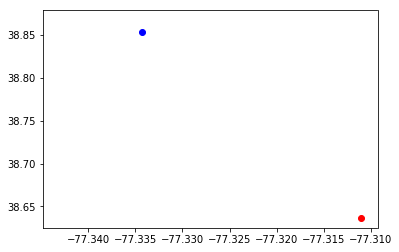

In [463]:
la0=ff0['lat']
lg0=ff0['lng']
plt.scatter(lg0, la0, color="b")
La0=hood5['Latitude']
Ln0=hood5['Longitude']
plt.scatter(Ln0, La0, color="r")
plt.show()

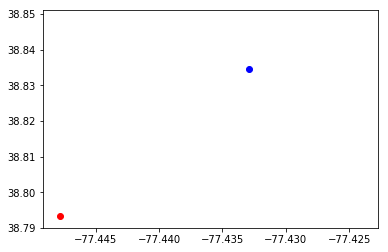

In [464]:
la1=ff1['lat']
lg1=ff1['lng']
plt.scatter(lg1, la1, color="b")
La1=hood24['Latitude']
Ln1=hood24['Longitude']
plt.scatter(Ln1, La1, color="r")
plt.show()

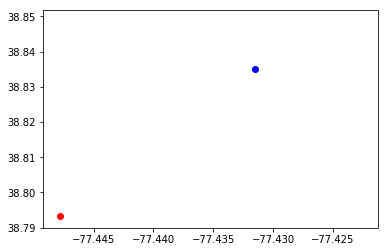

In [465]:
la2=ff2['lat']
lg2=ff2['lng']
plt.scatter(lg2, la2, color="b")
La2=hood24['Latitude']
Ln2=hood24['Longitude']
plt.scatter(Ln2, La2, color="r")
plt.show()

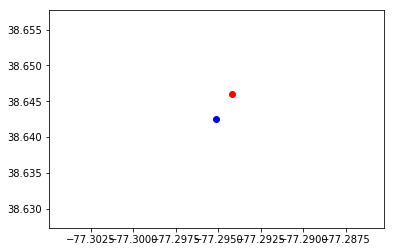

In [393]:
la3=ff3['lat']
lg3=ff3['lng']
plt.scatter(lg3, la3, color="b")
Ln3=hood18['Longitude']
La3=hood18['Latitude']
plt.scatter(Ln3, La3, color="r")
plt.show()

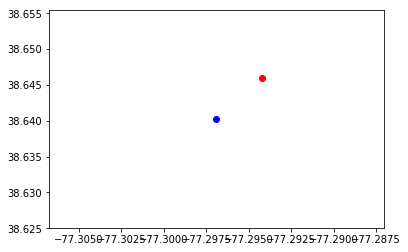

In [449]:
la4=ff4['lat']
lg4=ff4['lng']
plt.scatter(lg4, la4, color="b")
La4=hood18['Latitude']
Ln4=hood18['Longitude']
plt.scatter(Ln4, La4, color="r")
plt.show()

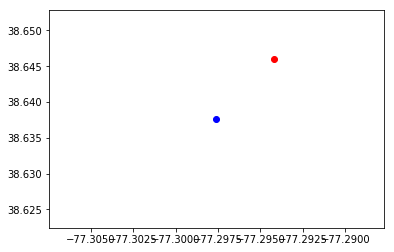

In [422]:
la5=ff5['lat']
lg5=ff5['lng']
plt.scatter(lg5, la5, color="b")
La5=hood18['Latitude']
Ln5=hood18['Longitude']
plt.scatter(Ln5, La5, color="r")
plt.show()

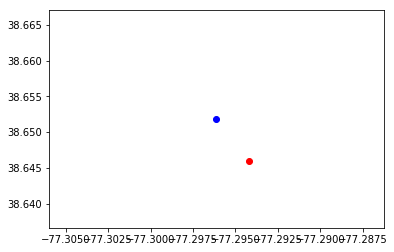

In [418]:
la6=ff6['lat']
lg6=ff6['lng']
plt.scatter(lg6, la6, color="b")
La6=hood18['Latitude']
Ln6=hood18['Longitude']
plt.scatter(Ln6, La6, color="r")
plt.show()

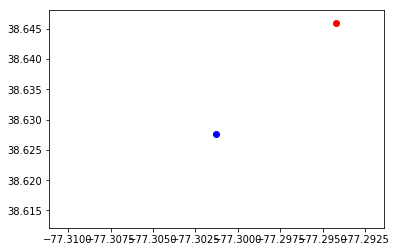

In [397]:
la7=ff7['lat']
lg7=ff7['lng']
plt.scatter(lg7, la7, color="b")
La7=hood18['Latitude']
Ln7=hood18['Longitude']
plt.scatter(Ln7, La7, color="r")
plt.show()

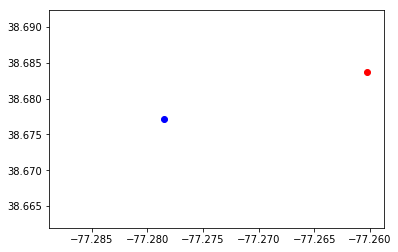

In [477]:
la8=ff8['lat']
lg8=ff8['lng']
plt.scatter(lg8, la8, color="b")
La8=hood17['Latitude']
Ln8=hood17['Longitude']
plt.scatter(Ln8, La8, color="r")
plt.show()

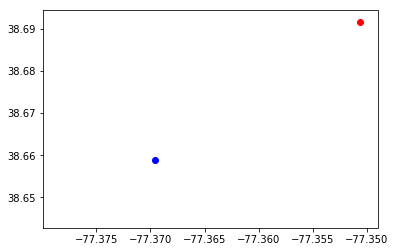

In [479]:
la9=ff9['lat']
lg9=ff9['lng']
plt.scatter(lg9, la9, color="b")
La9=hood4['Latitude']
Ln9=hood4['Longitude']
plt.scatter(Ln9, La9, color="r")
plt.show()

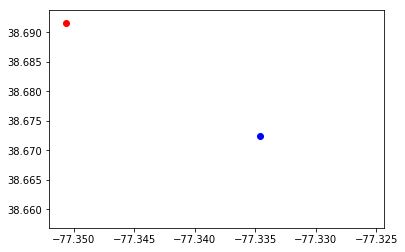

In [456]:
la10=ff10['lat']
lg10=ff10['lng']
plt.scatter(lg10, la10, color="b")
La10=hood4['Latitude']
Ln10=hood4['Longitude']
plt.scatter(Ln10, La10, color="r")
plt.show()

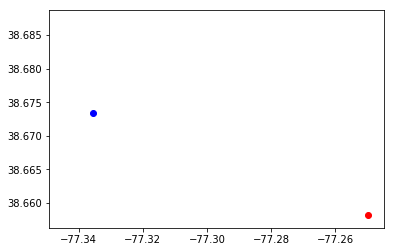

In [454]:
la11=ff11['lat']
lg11=ff11['lng']
plt.scatter(lg11, la11, color="b")
La11=hood5['Latitude']
Ln11=hood5['Longitude']
plt.scatter(Ln0, La0, color="r")
plt.show()

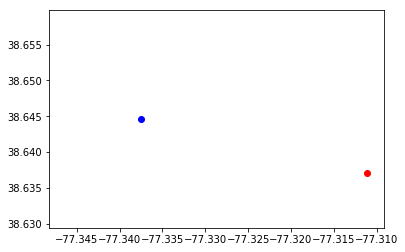

In [452]:
la12=ff12['lat']
lg12=ff12['lng']
plt.scatter(lg12, la12, color="b")
La12=hood5['Latitude']
Ln12=hood5['Longitude']
plt.scatter(Ln12, La12, color="r")
plt.show()

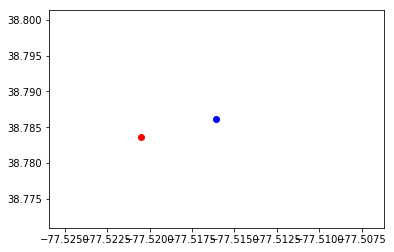

In [488]:
la13=ff13['lat']
lg13=ff13['lng']
plt.scatter(lg13, la13, color="b")
La13=hood1['Latitude']
Ln13=hood1['Longitude']
plt.scatter(Ln13, La13, color="r")
plt.show()

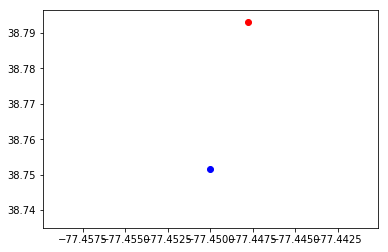

In [496]:
la14=ff14['lat']
lg14=ff14['lng']
plt.scatter(lg14, la14, color="b")
La14=hood24['Latitude']
Ln14=hood24['Longitude']
plt.scatter(Ln14, La14, color="r")
plt.show()

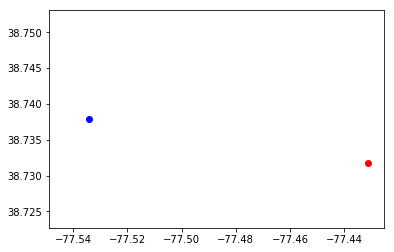

In [503]:
la15=ff15['lat']
lg15=ff15['lng']
plt.scatter(lg15, la15, color="b")
La15=hood0['Latitude']
Ln15=hood0['Longitude']
plt.scatter(Ln15, La15, color="r")
plt.show()

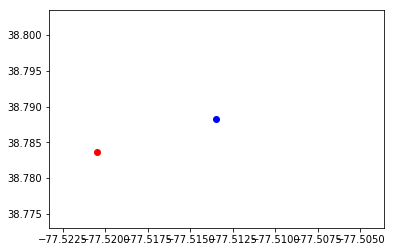

In [487]:
la16=ff16['lat']
lg16=ff16['lng']
plt.scatter(lg16, la16, color="b")
La16=hood1['Latitude']
Ln16=hood1['Longitude']
plt.scatter(Ln16, La16, color="r")
plt.show()

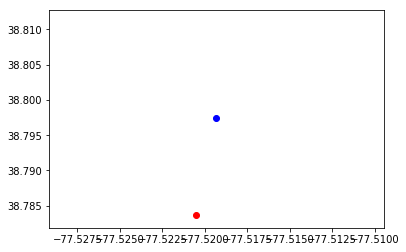

In [484]:
la17=ff17['lat']
lg17=ff17['lng']
plt.scatter(lg17, la17, color="b")
La17=hood1['Latitude']
Ln17=hood1['Longitude']
plt.scatter(Ln17, La17, color="r")
plt.show()

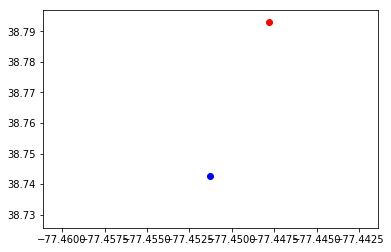

In [534]:
la18=ff18['lat']
lg18=ff18['lng']
plt.scatter(lg18, la18, color="b")
La18=hood24['Latitude']
Ln18=hood24['Longitude']
plt.scatter(Ln18, La18, color="r")
plt.show()

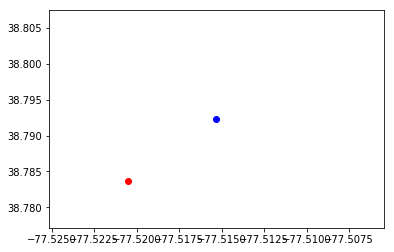

In [489]:
la19=ff19['lat']
lg19=ff19['lng']
plt.scatter(lg19, la19, color="b")
La19=hood1['Latitude']
Ln19=hood1['Longitude']
plt.scatter(Ln19, La19, color="r")
plt.show()

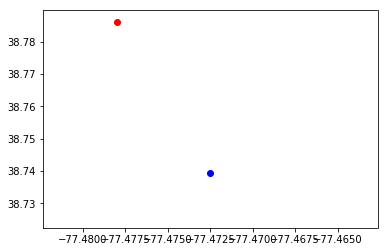

In [530]:
la20=ff20['lat']
lg20=ff20['lng']
plt.scatter(lg20, la20, color="b")
La20=hood12['Latitude']
Ln20=hood12['Longitude']
plt.scatter(Ln20, La20, color="r")
plt.show()

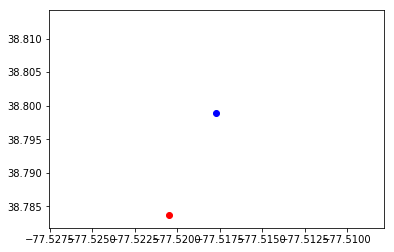

In [483]:
la21=ff21['lat']
lg21=ff21['lng']
plt.scatter(lg21, la21, color="b")
La21=hood1['Latitude']
Ln21=hood1['Longitude']
plt.scatter(Ln21, La21, color="r")
plt.show()

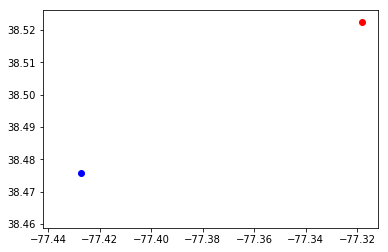

In [525]:
la22=ff22['lat']
lg22=ff22['lng']
plt.scatter(lg22, la22, color="b")
La22=hood19['Latitude']
Ln22=hood19['Longitude']
plt.scatter(Ln22, La22, color="r")
plt.show()

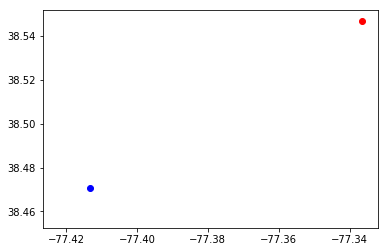

In [519]:
la23=ff23['lat']
lg23=ff23['lng']
plt.scatter(lg23, la23, color="b")
La23=hood22['Latitude']
Ln23=hood22['Longitude']
plt.scatter(Ln23, La23, color="r")
plt.show()

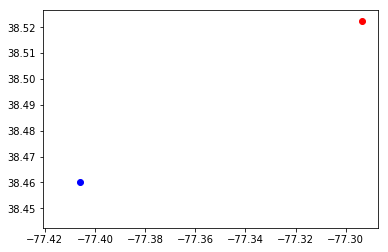

In [514]:
la24=ff24['lat']
lg24=ff24['lng']
plt.scatter(lg24, la24, color="b")
La24=hood20['Latitude']
Ln24=hood20['Longitude']
plt.scatter(Ln24, La24, color="r")
plt.show()

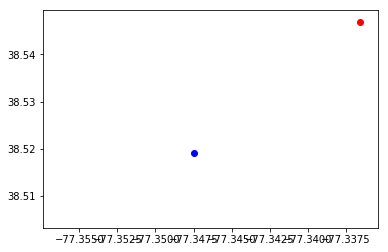

In [508]:
la25=ff25['lat']
lg25=ff25['lng']
plt.scatter(lg25, la25, color="b")
La25=hood22['Latitude']
Ln25=hood22['Longitude']
plt.scatter(Ln25, La25, color="r")
plt.show()

Now I will do analysis of the neighborhoods that have fastfood restaurants. 

In [535]:
d1={'Neighborhoods':['Buckhall','Bull Run','Bull Run Mountain Estates','Cherry Hill','County Center CDP','Dale City','Dumfries',
                    'Gainesville','Haymarket','Independent Hill','Lake Ridge','Linton Hall','Loch Lomond',
                    'Marumsco CDP','Montclair','Neabsco CDP','Nokesville','Occoquan','Potomac Mills',
                    'Quantico Base CDP','Quantico','Sudley','Triangle','Woodbridge','Yorkshire'], 
    'number of ffr':[1,5,0,0,1,4,0,0,0,0,0,0,13,0,0,0,0,1,5,0,1,0,3,0,4] }

In [536]:
pwffr_df=pd.DataFrame(data=d1)
pwffr_df

,Neighborhoods,number of ffr
0,Buckhall,1
1,Bull Run,5
2,Bull Run Mountain Estates,0
3,Cherry Hill,0
4,County Center CDP,1
5,Dale City,4
6,Dumfries,0
7,Gainesville,0
8,Haymarket,0
9,Independent Hill,0


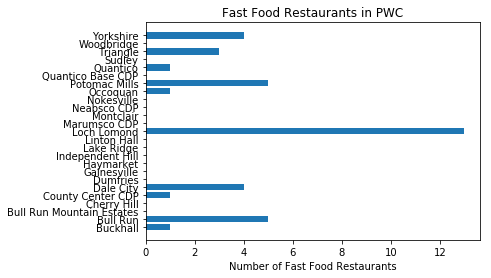

In [540]:
objects = pwffr_df['Neighborhoods']
y_pos = np.arange(len(objects))
performance = pwffr_df['number of ffr']

plt.barh(y_pos, performance, align='center', alpha=1)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Fast Food Restaurants')
plt.title('Fast Food Restaurants in PWC')

plt.show()